# Challenge 1 - Data Science: Alura Stores

## Indice

1. Descripción del proyecto.
2. Importación de librerias iniciales y extracción de datos (ETL)
3. Funciones
4. EDA *(Exploratory Data Analysis)*
5. Data Analysis:
   - Analisis de facturacion
   - Ventas por categoría
   - Calificación promedio de la tienda
   - Productos más y menos vendidos
   - Costo de envío promedio por tienda
6. Conclusión y recomendación

## 1. Descripción del proyecto

A continuación se realizará un analisis de datos proveninentes de 4 tiendas de la compañía **"Alura Stores"** con el objetivo de evaluar cual de ellas presenta menor rendimiento y proceder con la venta de la misma para utilizar el dinero en una nueva inversión.<br>
Para determinar esto, se evaluarán distintos aspectos de cada una de las tiendas, ya que diversos factores intervienen a la hora de diagnosticar el rendimiento de cada una de ellas. <br>
Para esto se analizará cada tienda de manera individual para su posterior comparación:
* Facturación
* Ventas por categoría de producto
* Calificación promedia efectuada por los clientes
* Menor y mayor volumen de productos vendidos
* Costo de envío promedio
<br>

*Nota: Se proporcionará visualización de los datos analizados para fácil interpretación de los mismos.*

Una vez finalizado el análisis, se proporcionará un informe detallado con las conclsiones resultantes y la recomendación final justificada.

## 2. Importación de librerías iniciales y extracción de datos (ETL)

### Importación de librerías iniciales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Extracción de datos (ETL)

In [2]:
# Leer los archivos .csv y almacenar su contenido en formato DataFrame, utilizando una variable por archivo (tienda).
df_tienda1 = pd.read_csv('tienda_1.csv')
df_tienda2 = pd.read_csv('tienda_2.csv')
df_tienda3 = pd.read_csv('tienda_3.csv')
df_tienda4 = pd.read_csv('tienda_4.csv')

## 3. Funciones

In [3]:
def crear_boxplot(df: pd.DataFrame, 
                  columna: str, 
                  orientacion: str='h',
                  titulo: str=None):
    """
    Esta función esta diseñada para generar un boxplot para mostrar la distribución de los datos de una columna de un DataFrame
    -----------------------------------------------------------
    Parámetros:
        df: pd.DataFrame
            DataFrame que se quiere explorar
        columna: str
            Columna sobre la cual queremos visualizar la distribución de los datos
        orientacion: str
            Valor por defecto = h: el gráfico estará ubicado horizontalmente
            En caso de querer visualizarlo de forma vertical: orientacion='v'
        titulo: str
            Titulo que deseamos darle al gráfico
    -----------------------------------------------------------
    Returns:
        Boxplot para visualización de distribución de datos
    """
    # Generar el gráfico de bigotes
    sns.boxplot(df[columna], orient=orientacion)
    # Establecer título del gráfico
    plt.title(titulo if titulo else f'Boxplot: {columna}')

    return plt.show()

In [4]:
def crear_barplot(df: pd.DataFrame, 
                  columna1: str,
                  plot_size: tuple=(8,6),
                  ax=None,
                  titulo: str=None, 
                  xlabel: str=None, 
                  ylabel: str=None, 
                  xlabel_rotation: int=None, 
                  ha: str='center', 
                  ylim: int=None, 
                  mostrar_valores: bool=False):

    """
    Esta función esta diseñada para generar un gráfico de barras que contabiliza la frecuencia de los datos de una columna de un DataFrame
    -----------------------------------------------------------
    Parámetros:
        df: pd.DataFrame
            DataFrame de donde se obtendrán los datos
        columna: str
            Columna sobre la cual queremos contar la frecuencia de valores
        plot_size: tuple
            Tupla que contiene ancho y alto de la figura
        ax: Axes
            Objeto de matplotlib que determina la distribucion del gráfico en la figura
        titulo: str
            Titulo del gráfico
        xlabel: str
            Etiqueta del eje de las abscisas
                En caso de no definir, se utilizará el nombre de la columna analizada
        ylabel: str
            Etiqueta del eje de las ordenadas
                En caso de no definir, se utilizará 'Frecuencia'
        xlabel_rotation: int
            Grados por los cuales se quiere rotar las etiquetas del eje de las abscisas (valores únicos de la columna analizada)
                Por defecto no se rotarán las etiquetas
        ha: str
            Ubicación de las etiquetas en relación a las barras. Valores válidos = 'left', 'center', 'right'
                Por defecto se ubicarán en 'center'
        ylim: int
            Límite superior del eje de las ordenadas
                Por defecto no tiene límite
        mostrar_valores: bool
            Etiquetas con los valores de frecuencia de cada barra ubicados en la parte superior de cada una de ellas.
                Por defecto establecido en False, definir en True para mostrar
    -----------------------------------------------------------
    Returns:
        Gráfico de barras para visualización de frecuencia de datos
    """
        
    # Generar DataFrame con valores unicos en la columna indicada y su frecuencia
    datos = df[columna1].value_counts().reset_index()
    # Establecer el nombre de las columnas del nuevo DataFrame
    datos.columns = [columna1, 'Frecuencia']


    # Si no se ha pasado un axis para el grafico, se crea (esto permitirá utilizar esta función dentro de otra)
    if ax is None:
        fig, ax = plt.subplots(figsize=plot_size)
    
    # Generar el grafico de barras
    sns.barplot(
        # Indicar la fuente de datos para crear el gráfico
        data=datos,
        # Indicar la columna que corresponde al eje de las abscisas
        x = columna1,
        # Indicar la columna que corresponde al eje de las ordenadas
        y = 'Frecuencia',
        # Indicar parametro para diferenciar los colores del gráfico (aqui cada etiqueta tendrá un valor
        hue=columna1,
        # Indicar la paleta de colores que se quiere utilizar en el gráfico
        palette='colorblind',
        # Indicar que no se debe mostrar la leyenda ya que ya estan las etiquetas en el eje x
        legend=False,
        # Indicar el axis en el que debe ser dibujada la figura)
        ax=ax)

    # Confirugrar el titulo del gráfico
    ax.set_title(titulo if titulo else f'Frecuencia de {columna1}')
    # Configurar la etiqueta del eje de las abscisas
    ax.set_xlabel(xlabel if xlabel else columna1)
    # Configurar la etiqueta del eje de las ordenadas
    ax.set_ylabel(ylabel if ylabel else 'Frecuencia')

    # Validar si se ha declarado el argumento ylim
    if ylim:
        # Establecer el límite superior del eje de las ordenadas
        ax.set_ylim(0, ylim)

    # Validar si se ha declarado el argumento para rotación de las etiquetas del eje de las abscisas
    if xlabel_rotation:
        x_ticks = datos[columna1]
        # Rotar las etiquetas del eje de las abscisas
        ax.set_xticks(x_ticks, labels=x_ticks,rotation=xlabel_rotation, ha=ha)

    # Validar si se ha declarado el argumento para mostrar el valor de cada barra
    if mostrar_valores:
        # Iterar sobre cada barra del gráfico que se ha almacenado el la variable ax
        for bar in ax.patches:
            # Obtener la altura de la barra (frecuencia)
            altura = bar.get_height()
            # Función para escribir sobre la figura
            ax.text(
                # Obtener el punto de iniciación de la barra y su ancho y luego dividir por 2 para ubicar la etiqueta en el centro
                bar.get_x() + bar.get_width() / 2,
                # agregar pixeles a la altura de la barra para separar el texto
                altura + 15,
                # convertir el valor en integer
                f'{round(altura):,.0f}',
                # Centrar la etiqueta
                ha='center',
                # Configurar el tamaño de la letra de la etiqueta
                fontsize=12)

    # Retornar la figura
    return ax

In [5]:
def serie_temporal(df: pd.DataFrame,
                   columna_fecha: str,
                   columna_valores: str,
                   plot_size: tuple=(8, 6),
                   ax=None,
                   titulo: str=None,
                   xlabel: str=None,
                   ylabel: str=None,
                   ylim: int=None,
                   xlabel_rotation: int=None,
                   mostrar_valores: bool=False):

    if ax is None:
        fig, ax = plt.subplots(figsize=plot_size)

    ax.plot(df[columna_fecha], df[columna_valores], marker='o')

    ax.set_title(titulo if titulo else f'Serie Temporal {columna_valores}')
    ax.set_xlabel(xlabel if xlabel else f'{columna_fecha}')
    ax.set_ylabel(ylabel if ylabel else f'{columna_valores}')

    if ylim:
        ax.set_ylim(0, ylim)

    
    ax.set_xticklabels([])
    
    return ax

In [6]:
def crear_piechart(df: pd.DataFrame,
                  columna1: str,
                  columna2: str,
                  plot_size: tuple=(8, 6),
                  ax=None,
                  titulo: str=None,
                  xlabel: str=None,
                  ylabel: str=None,
                  ylim: int=None,
                  xlabel_rotation: int=None,
                  mostrar_valores: bool=False):

    # Generar DataFrame con valores unicos en la columna indicada y su frecuencia
    datos = df.groupby(columna1)[columna2].sum().reset_index()
    # Establecer el nombre de las columnas del nuevo DataFrame
    datos.columns = [columna1, 'Sumatoria']
    # Agregar columna con el porcentaje de cada categoría
    total = sum(datos['Sumatoria'])
    datos['Porcentaje'] = datos['Sumatoria'].apply(lambda row: f'{round(row / total * 100):.2f}%')

    # Si no se ha pasado un axis para el grafico, se crea (esto permitirá utilizar esta función dentro de otra)
    if ax is None:
        fig, ax = plt.subplots(figsize=plot_size)

    # Crear una paleta de colores con seaborn
    colors = sns.color_palette("colorblind", len(datos))  # Puedes elegir cualquier paleta de seaborn
    
    # Generar el pie chart
    wedges, texts = ax.pie(
                            # Indicar la fuente de datos para crear el gráfico
                            datos['Sumatoria'],
                            # Establecer etiquetas
                            labels=datos['Porcentaje'],
                            # Establecer colores de los slices
                            colors=colors,
                            # Ajusta la distancia de las etiquetas respecto a las porciones
                            labeldistance=1.1  
                           )

    if xlabel_rotation:
        for text in texts:
            text.set_rotation(xlabel_rotation)
                                        
    
    ax.legend(labels=datos[columna1], loc="upper left", bbox_to_anchor=(1, 1), title=columna1)
              
    return ax

In [7]:
from typing import Callable, List

def graficos_comparacion(df_list: List[pd.DataFrame],
                         grafico: Callable,
                         columna_1: str,
                         columna_2: str=None,
                         super_title: str=None,
                         figsize: tuple=(12, 12),
                         ylim: int=None,
                         xlabel_rotation: int=None,
                         mostrar_valores: bool=False,
                         tipo: str=None):
                         

    """
    Esta función esta diseñada para crear una figura con subplots para visualizar y comprar estadísticas de las 4 tiendas en una única visualización
    -----------------------------------------------------------------------------------------------------------------------------
    Parámetros:
        df_list: list
            Lista que contenga los DataFrames a comparar
        grafico: Callable
            función que cree un gráfico por DataFrame
        columna: C
    """

    # Calcular la cantidad de filas que tendrá la figura
    rows = int(np.floor(len(df_list)/2))
    # Calcular la cantidad de columnas que tendrá la figura
    columns = int(np.ceil(len(df_list)/rows))

    # Definir la figura y cantidad de sub plots
    fig, axes = plt.subplots(rows, columns, figsize=figsize)

    # Definir el titulo de la figura principal (comparación que se está haciendo)
    fig.suptitle(super_title if super_title else 'Comparación Tiendas')

    # Iterar sobre la lista de DataFrames, obteniendo el indice y el DataFrame a trabajar
    for idx, df in enumerate(df_list):
        
        # Obtener la fila y columna en la cual debe ir el grafico de la iteración actual
        row = idx // columns # la división entera devuelve cuantas filas se llenaron
        col = idx % columns # la división modular se reiniciará a 0 cuando se completen las columnas de una fila

        # Seleccionar donde debe ir la figura, si hay solo una fila, se utilizará solo el valor de la columna
        ax = axes[row, col] if rows > 1 else axes[col]

        # Configurar el titulo del subplot utilizando el indice de iteración
        sub_titulo = f'Tienda {idx+1}'

        # Generar el sub plot utilizando la funcion pasada como argumento (Callable) y validando si se necesita más de una columna para graficar
        if grafico == crear_barplot:
            grafico(df, columna_1, ax=ax, plot_size=(6,4),titulo=sub_titulo, 
                    ylim=ylim, xlabel_rotation=xlabel_rotation, mostrar_valores=mostrar_valores, frecuencia=True)
        elif grafico == serie_temporal:
                grafico(df, columna_1, columna_2, ax=ax, plot_size=(6,4), titulo=sub_titulo, 
                        ylim=ylim, xlabel_rotation=xlabel_rotation,mostrar_valores=mostrar_valores)
            
        
    # Ajustar la presentación de la figura principal
    plt.tight_layout()
    # Mostrar el gráfico
    plt.show()

In [8]:
    """
def trasnformar_campo_fecha(df: pd.DataFrame, columna: str, formato: str='%d/%m/%Y'):

    Esta función toma un DataFrame y una columna de fechas, y lo transforma sus datos en tipo date. Lo que permitirá hacer cálculos con las mismas
    ----------------------------------------------------------------------------
    Parámetros:
        df: pd.DataFrame
            Nombre de la variable en la que se encuentra el DataFrame
        columa: str
            Columna que contiene las fechas que queremos manipular
        formato: str
            Formato en el que se encuentran las fechas
                Por defecto la función tomará DD/MM/YYYY
    ----------------------------------------------------------------------------
    Returns:
        pd.Series tipo date

    
    df[columna] = pd.to_datetime(df[columna], format=formato).dt.date
        """

"\ndef trasnformar_campo_fecha(df: pd.DataFrame, columna: str, formato: str='%d/%m/%Y'):\n\nEsta función toma un DataFrame y una columna de fechas, y lo transforma sus datos en tipo date. Lo que permitirá hacer cálculos con las mismas\n----------------------------------------------------------------------------\nParámetros:\n    df: pd.DataFrame\n        Nombre de la variable en la que se encuentra el DataFrame\n    columa: str\n        Columna que contiene las fechas que queremos manipular\n    formato: str\n        Formato en el que se encuentran las fechas\n            Por defecto la función tomará DD/MM/YYYY\n----------------------------------------------------------------------------\nReturns:\n    pd.Series tipo date\n\n\ndf[columna] = pd.to_datetime(df[columna], format=formato).dt.date\n    "

## 4. Analisis Exploratorio de Datos (EDA)

#### Tienda 1

In [9]:
# Observar la estructura del DataFrame
df_tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [10]:
# Información sobre columnas, cantidad de registros, valores nulos y tipos de datos
df_tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [11]:
# Resumen de estadísticas descriptivas de variables numéricas
df_tienda1.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


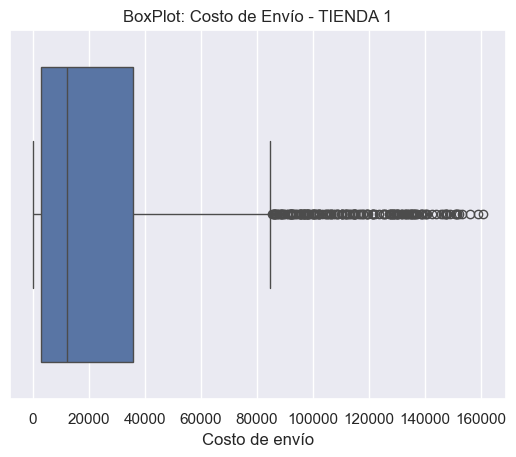

In [12]:
crear_boxplot(df_tienda1, 'Costo de envío', titulo='BoxPlot: Costo de Envío - TIENDA 1')

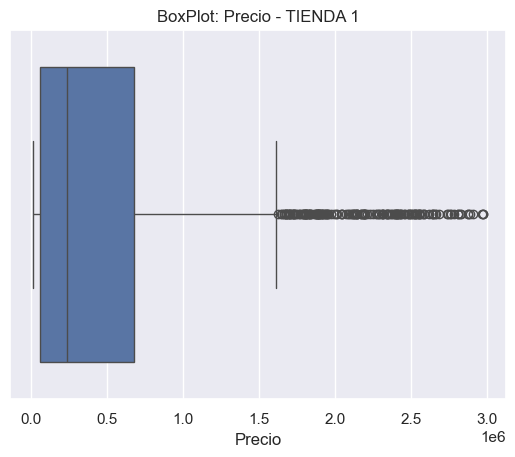

In [13]:
crear_boxplot(df_tienda1, 'Precio', titulo='BoxPlot: Precio - TIENDA 1')

#### Tienda 2

In [14]:
df_tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


In [15]:
# Información sobre columnas, cantidad de registros, valores nulos y tipos de datos
df_tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [16]:
# Resumen de estadísticas descriptivas de variables numéricas
df_tienda2.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.732274e+05,25216.235693,4.037304,2.902501,5.499753,-74.742963
std,5.955595e+05,31741.375166,1.356153,2.848416,2.351118,1.185997
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.455000e+04,2900.000000,4.000000,1.000000,4.609710,-75.563590
50%,2.182000e+05,11600.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.777000e+05,35450.000000,5.000000,4.000000,6.251840,-74.081750
max,2.953400e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


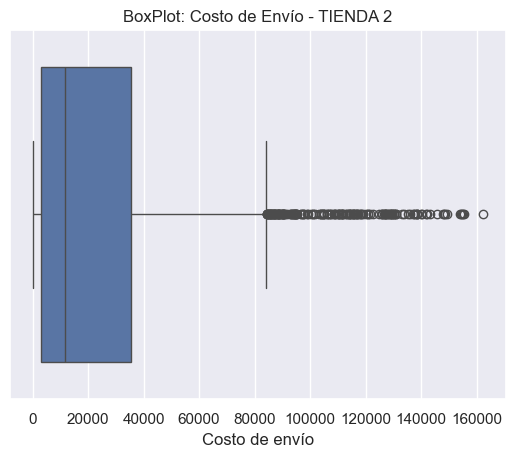

In [17]:
crear_boxplot(df_tienda2, 'Costo de envío', titulo='BoxPlot: Costo de Envío - TIENDA 2')

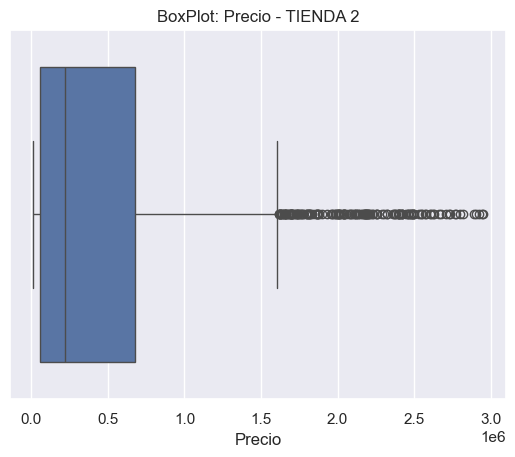

In [18]:
crear_boxplot(df_tienda2, 'Precio', titulo='BoxPlot: Precio - TIENDA 2')

#### Tienda 3

In [19]:
df_tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


In [20]:
# Información sobre columnas, cantidad de registros, valores nulos y tipos de datos
df_tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [21]:
# Resumen de estadísticas descriptivas de variables numéricas
df_tienda3.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.654598e+05,24805.680373,4.048326,2.967783,5.437076,-74.733463
std,5.806434e+05,30945.889626,1.386426,2.812153,2.405272,1.224572
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.740000e+04,3100.000000,4.000000,1.000000,4.609710,-75.563590
50%,2.263000e+05,11900.000000,5.000000,2.000000,4.609710,-74.199040
75%,6.660500e+05,34950.000000,5.000000,4.000000,6.251840,-74.081750
max,2.968200e+06,158400.000000,5.000000,24.000000,11.544440,-67.923900


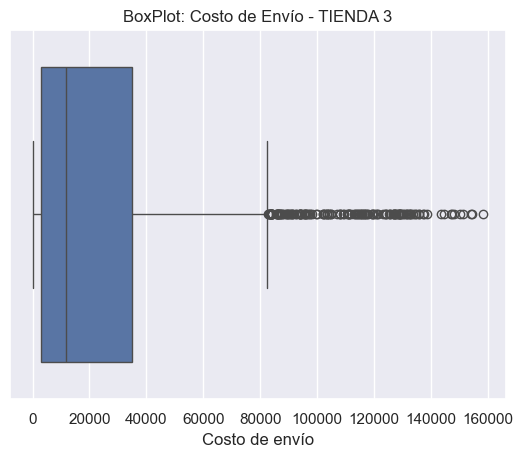

In [22]:
crear_boxplot(df_tienda3, 'Costo de envío', titulo='BoxPlot: Costo de Envío - TIENDA 3')

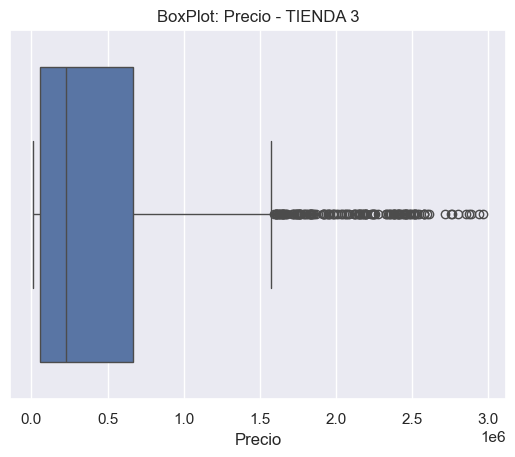

In [23]:
crear_boxplot(df_tienda3, 'Precio', titulo='BoxPlot: Precio - TIENDA 3')

#### Tienda 4

In [24]:
df_tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


In [25]:
# Información sobre columnas, cantidad de registros, valores nulos y tipos de datos
df_tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


In [26]:
# Resumen de estadísticas descriptivas de variables numéricas
df_tienda4.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.358000e+03,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,4.403629e+05,23459.457167,3.995759,2.896098,5.413519,-74.774597
std,5.687556e+05,30279.100836,1.403063,2.730393,2.376728,1.199749
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.340000e+04,2900.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.094500e+05,10950.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.342250e+05,33300.000000,5.000000,4.000000,6.251840,-74.081750
max,2.902200e+06,154700.000000,5.000000,18.000000,11.544440,-67.923900


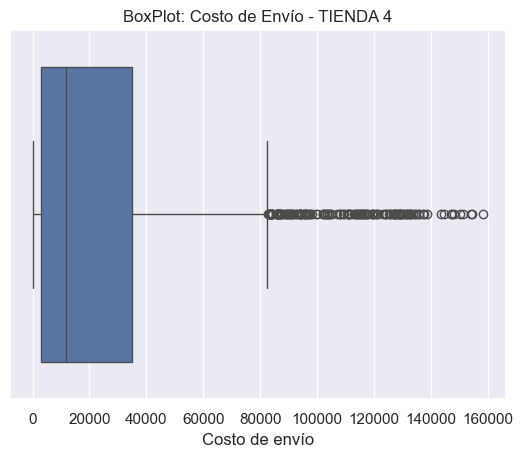

In [27]:
crear_boxplot(df_tienda3, 'Costo de envío', titulo='BoxPlot: Costo de Envío - TIENDA 4')

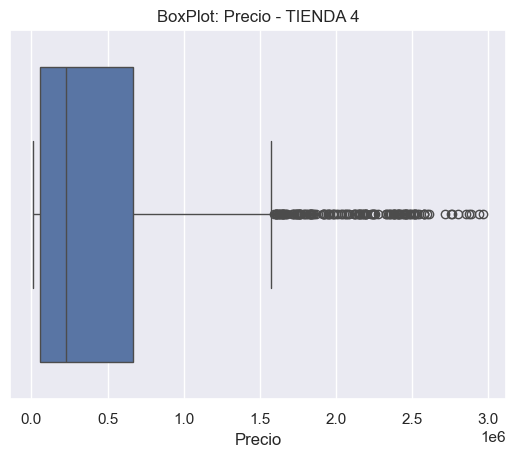

In [28]:
crear_boxplot(df_tienda3, 'Precio', titulo='BoxPlot: Precio - TIENDA 4')

### Observaciones: Análisis Exploratorio de Datos

Algunas apreciaciones que podemos obtener inicialmente son las siguientes:

* Ninguno de los datasets presentan valores nulos.
* Los datasets están balanceados, es decir, tenemos la misma cantidad de registros para cada uno de ellos (excepto Tienda 4 que tiene 1 registro menos, lo cual es insignificante para este tipo de análisis.
* Existen muchos registros por encima del ***percentil 97.5*** tanto en 'Costo de envío' como en 'Precio'. Estos, podrían ser interpretados como outliers, o también describir que tanto la cobertura geográfica de las tiendas como la variedad de productos es amplia, lo cual genera una dispersión natural de los datos. Algunos análisis para explicar esto:
  - En 'Costo de envío', podemos suponer que las tiendas distribuyen a una gran variedad de clientes, no solo en una zona cerca a donde se encuentra la tienda, esto explicaría la existencia de clientes que pagan bastante más de lo habitual por recibir los productos. O también que dependiendo del tipo de producto existan costos muy elevados, es razonable que no se pague lo mismo por enviar una 'Pandereta' que por enviar una 'Heladera'.
  - En cuanto a 'Precio', la compañía vende una amplia categoría de productos, esto resulta en que haya compras realizadas por los clientes por precios que exceden valor en relación a otros.

## 5. Data Analysis

*A lo largo de análisis de datos se irán creando **checkpoints**:* estos son copias de los DataFrames originales, con el objetivo de manipular sin correr el riesgo de alterar las fuentes de datos iniciales.

### Ranking Final

A continuación crearé un diccionario que contendrá las calificaciones de cada tienda para cada uno de los aspectos analizados *(simluando un análisis RFM de segmentación de clientes)*, lo que permitirá, una vez esté completo, una fácil visualización del desempeño de cada tienda en los aspectos evaluados.

In [29]:
ranking_final = {
                 'Tienda 1': {}, 
                 'Tienda 2': {}, 
                 'Tienda 3': {}, 
                 'Tienda 4': {}
                }

### Análisis de Facturación

In [30]:
# Checkpoints para Análisis de Facturación
df_facturacion_tienda1 = df_tienda1.copy()
df_facturacion_tienda2 = df_tienda2.copy()
df_facturacion_tienda3 = df_tienda3.copy()
df_facturacion_tienda4 = df_tienda4.copy()

In [31]:
# Transformar campo de fecha a tipo datetime
df_facturacion_tienda1['Fecha de Compra'] = pd.to_datetime(df_facturacion_tienda1['Fecha de Compra'], format='%d/%m/%Y')
df_facturacion_tienda2['Fecha de Compra'] = pd.to_datetime(df_facturacion_tienda2['Fecha de Compra'], format='%d/%m/%Y')
df_facturacion_tienda3['Fecha de Compra'] = pd.to_datetime(df_facturacion_tienda3['Fecha de Compra'], format='%d/%m/%Y')
df_facturacion_tienda4['Fecha de Compra'] = pd.to_datetime(df_facturacion_tienda4['Fecha de Compra'], format='%d/%m/%Y')

In [32]:
# Eliminar columnas que no serán necesarias para este análisis
df_facturacion_tienda1 = df_facturacion_tienda1.drop(['Producto', 'Categoría del Producto', 'Costo de envío', 'Lugar de Compra', 'Calificación', 'lat', 'lon'], axis=1)
df_facturacion_tienda2 = df_facturacion_tienda2.drop(['Producto', 'Categoría del Producto', 'Costo de envío', 'Lugar de Compra', 'Calificación', 'lat', 'lon'], axis=1)
df_facturacion_tienda3 = df_facturacion_tienda3.drop(['Producto', 'Categoría del Producto', 'Costo de envío', 'Lugar de Compra', 'Calificación', 'lat', 'lon'], axis=1)
df_facturacion_tienda4 = df_facturacion_tienda4.drop(['Producto', 'Categoría del Producto', 'Costo de envío', 'Lugar de Compra', 'Calificación', 'lat', 'lon'], axis=1)

In [33]:
# Obtener Año y Mes de cada venta para luego hacer agrupación por mes, respetando la secuencia cronológica
df_facturacion_tienda1['Año-Mes'] = df_facturacion_tienda1['Fecha de Compra'].dt.strftime('%Y-%m')
df_facturacion_tienda2['Año-Mes'] = df_facturacion_tienda2['Fecha de Compra'].dt.strftime('%Y-%m')
df_facturacion_tienda3['Año-Mes'] = df_facturacion_tienda3['Fecha de Compra'].dt.strftime('%Y-%m')
df_facturacion_tienda4['Año-Mes'] = df_facturacion_tienda4['Fecha de Compra'].dt.strftime('%Y-%m')

In [34]:
# Agrupación por Mes y Año para graficar la evolución de la facturación
df_fact_mes_tienda1 = df_facturacion_tienda1.groupby(['Año-Mes']).sum(['Precio']).reset_index()
df_fact_mes_tienda2 = df_facturacion_tienda2.groupby(['Año-Mes']).sum(['Precio']).reset_index()
df_fact_mes_tienda3 = df_facturacion_tienda3.groupby(['Año-Mes']).sum(['Precio']).reset_index()
df_fact_mes_tienda4 = df_facturacion_tienda4.groupby(['Año-Mes']).sum(['Precio']).reset_index()

In [35]:
dfs_meses = [df_fact_mes_tienda1, df_fact_mes_tienda2, df_fact_mes_tienda3, df_fact_mes_tienda4]

In [36]:
fecha_min = df_fact_mes_tienda1['Año-Mes'].min()
fecha_max = df_fact_mes_tienda1['Año-Mes'].max()

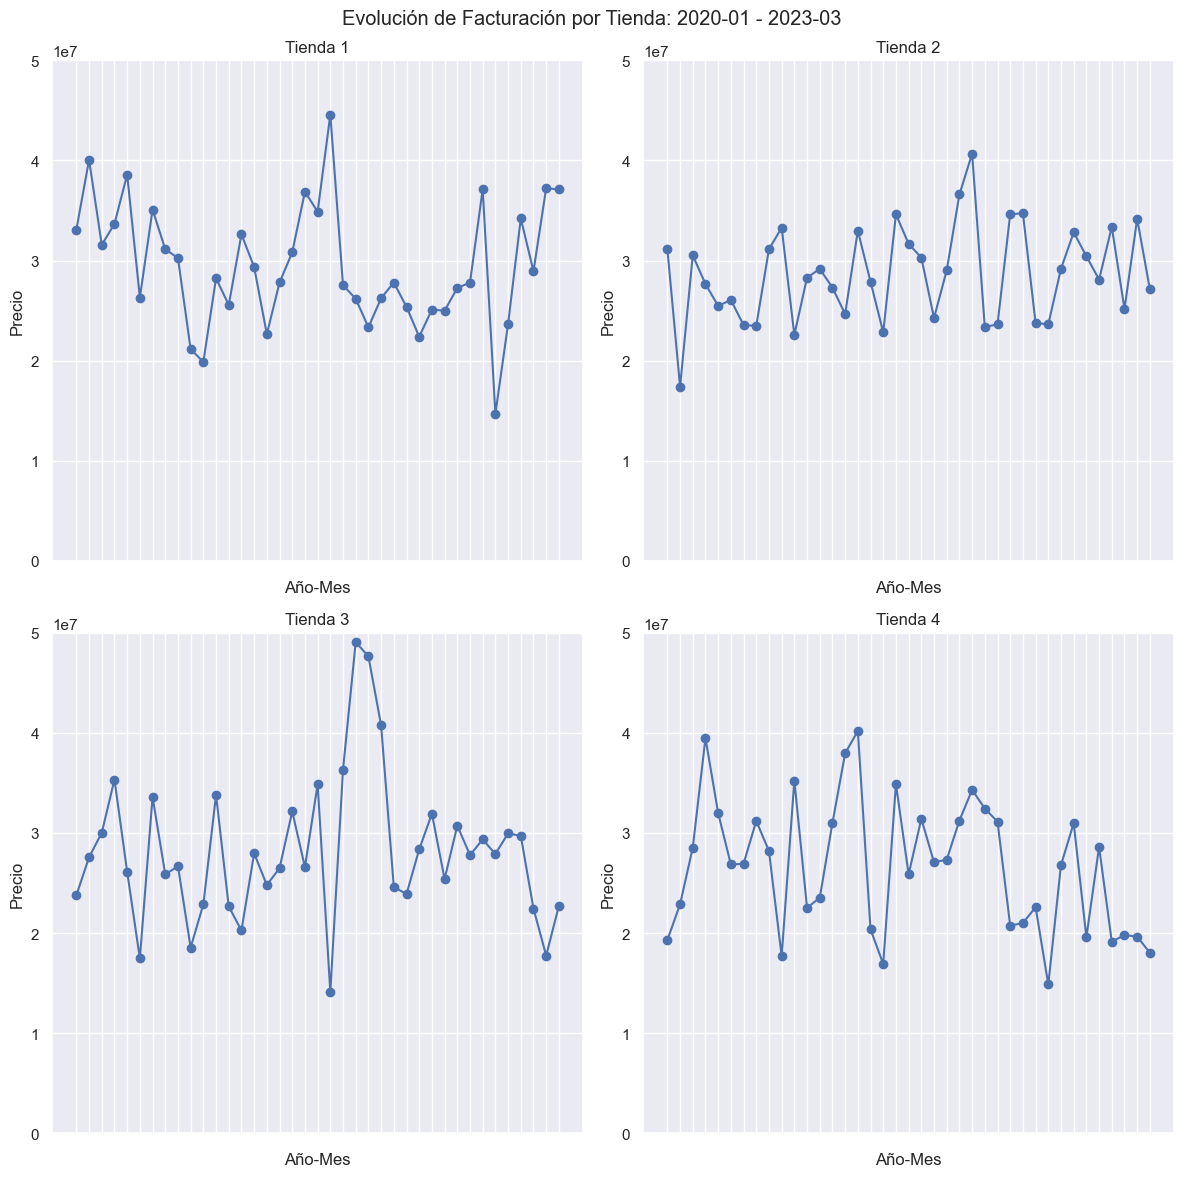

In [37]:
graficos_comparacion(df_list=dfs_meses, 
                     grafico=serie_temporal,
                     columna_1='Año-Mes',
                     columna_2='Precio',
                     super_title= f'Evolución de Facturación por Tienda: {fecha_min} - {fecha_max}',
                     ylim=5e7)

#### Observaciones iniciales:

A partir de los gráficos presentados, podemos observar lo siguiente:

* Las **tiendas 1 y 2** presentan una evolución de la facturación relativamente estable.
* La **tienda 3** presenta varios picos pronunciados, pero también es la que mantiene el record más alto de facturación.
* La **tienda 4** es la que presenta picos pronunciados, varios meses en los que la facturación no superó los **20.000.000**, entre ellos los últimos 4 meses, por lo que podemos resumir que ultimamente es la que más problemas está teniendo en cuanto a ingresos.

#### Comparaciones

Realizaré un DataFrame con algunas cifras de cada una de las tiendas para una facil visualización y comparación entre ellas

In [38]:
dfs_facturacion = [df_facturacion_tienda1, df_facturacion_tienda2, df_facturacion_tienda3, df_facturacion_tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

comparacion_facturacion = {}

for i, df in enumerate(dfs_facturacion):
    venta_total = df['Precio'].sum()
    dias = (df['Fecha de Compra'].max() - df['Fecha de Compra'].min()).days
    venta_promedio_diaria = venta_total / dias
    venta_mensual_promedio = df.groupby('Año-Mes')['Precio'].sum().mean()
    venta_mensual_maxima = df.groupby(['Año-Mes'])['Precio'].sum().max()
    venta_mensual_minima = df.groupby('Año-Mes')['Precio'].sum().min()
    cuotas_ofrecidas = df['Cantidad de cuotas'].sum()
    columnas = {'Venta total': f'{venta_total:,.2f}', 
              'Venta Diaria Promedio': f'{round(venta_promedio_diaria, 2):,.2f}',
              'Venta Mensual Promedio': f'{round(venta_mensual_promedio, 2):,.2f}',
              'Venta Mensual Máxima': f'{round(venta_mensual_maxima, 2):,.2f}',
              'Venta Mensual Mínima': f'{round(venta_mensual_minima, 2):,.2f}',
              'Coutas Ofrecidas': cuotas_ofrecidas}

    comparacion_facturacion[nombres[i]] = columnas

df_facturacion = pd.DataFrame.from_dict(comparacion_facturacion, orient='index')
df_facturacion

,Venta total,Venta Diaria Promedio,Venta Mensual Promedio,Venta Mensual Máxima,Venta Mensual Mínima,Coutas Ofrecidas
Tienda 1,"1,150,880,400.00","971,207.09","29,509,753.85","44,571,100.00","14,682,000.00",6943
Tienda 2,"1,116,343,500.00","942,062.03","28,624,192.31","40,668,800.00","17,388,800.00",6847
Tienda 3,"1,098,019,600.00","926,598.82","28,154,348.72","49,081,500.00","14,113,600.00",7001
Tienda 4,"1,038,375,700.00","877,006.50","26,625,017.95","40,195,600.00","14,870,800.00",6829


#### Observaciones finales:

Confirmando lo que se observó en los gráficos presentados anteriormente, podemos concluir lo siguiente en cuanto a la **Facturación** de cada tienda:

* **Tienda 1:** Es la tienda que tiene una *Venta Total*, *Venta Diaria Promedio* y *Venta Mensual Promedio* mayor al resto.
* **Tienda 2:** Ocupa el segundo lugar en *Venta Total*, *Venta Diaria Promedio* y *Venta Mensual Promedio*. A su vez, no esta en el último lugar en *Venta Mensual Máxima* y es la que su *Venta Mensual Mínima* es mayor, por lo cual, resulta ser la tienda más estable.
* **Tienda 3:** Tienda con la mayor *Venta Máxima Mensual* como así la menor *Venta Mínima Mensual*, por lo que presenta mayor inestabilidad que las **Tiendas 1 y 2** pero aún con fuertes ingresos.
* **Tienda 4:** Esta es la tienda que peor ha calificado en relación a la facturación. En todos los campos analizados podemos ver que presenta los valores más bajos. Por lo cual en términos de facturación queda en último lugar.

*Nota: mantuve las cuotas ofrecidas para visualizar si existía una gran diferencia entre estas, ya que una menor cantidad de la misma podría indicar mejor liquidez para la empresa y este podría ser un factor a analizar. Pero a partir de los numeros provistos por el análisis, estos valores no aportan mucho poder analítico.*

**Puntuación Ranking Final - Apartado: Facturación**

In [39]:
for key in ranking_final.keys():
    if key == 'Tienda 1':
        puesto = '1'
    elif key == 'Tienda 2':
        puesto = '2'
    elif key == 'Tienda 3':
        puesto = '3'
    else:
        puesto = '4'
    
    ranking_final[key]['Facturación'] = puesto

### Ventas por Categoría

Ahora analizaremos la venta de productos por categoría, para 

In [47]:
df_categorias_tienda1 = df_tienda1.copy()
df_categorias_tienda2 = df_tienda2.copy()
df_categorias_tienda3 = df_tienda3.copy()
df_categorias_tienda4 = df_tienda4.copy()

In [48]:
df_categorias_tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [49]:
df_categorias_tienda1 = df_categorias_tienda1.drop(['Costo de envío', 'Fecha de Compra', 'Vendedor', 
                                                    'Lugar de Compra', 'Calificación', 'Método de pago', 
                                                    'lat', 'lon'], 
                                                   axis=1)
df_categorias_tienda2 = df_categorias_tienda2.drop(['Costo de envío', 'Fecha de Compra', 'Vendedor', 
                                                    'Lugar de Compra', 'Calificación', 'Método de pago', 
                                                    'lat', 'lon'], 
                                                   axis=1)
df_categorias_tienda3 = df_categorias_tienda3.drop(['Costo de envío', 'Fecha de Compra', 'Vendedor', 
                                                    'Lugar de Compra', 'Calificación', 'Método de pago', 
                                                    'lat', 'lon'], 
                                                   axis=1)
df_categorias_tienda4 = df_categorias_tienda4.drop(['Costo de envío', 'Fecha de Compra', 'Vendedor', 
                                                    'Lugar de Compra', 'Calificación', 'Método de pago', 
                                                    'lat', 'lon'], 
                                                   axis=1)


In [45]:
df_categorias_tienda1.head()

,Producto,Categoría del Producto,Precio,Cantidad de cuotas
0,Asistente virtual,Electrónicos,164300.0,8
1,Mesa de comedor,Muebles,192300.0,4
2,Juego de mesa,Juguetes,209600.0,1
3,Microondas,Electrodomésticos,757500.0,1
4,Silla de oficina,Muebles,335200.0,1


In [ ]:
dfs_categorias = [df_categorias_tienda1, df_categorias_tienda2, df_categorias_tienda3, df_categorias_tienda4]

<Axes: >

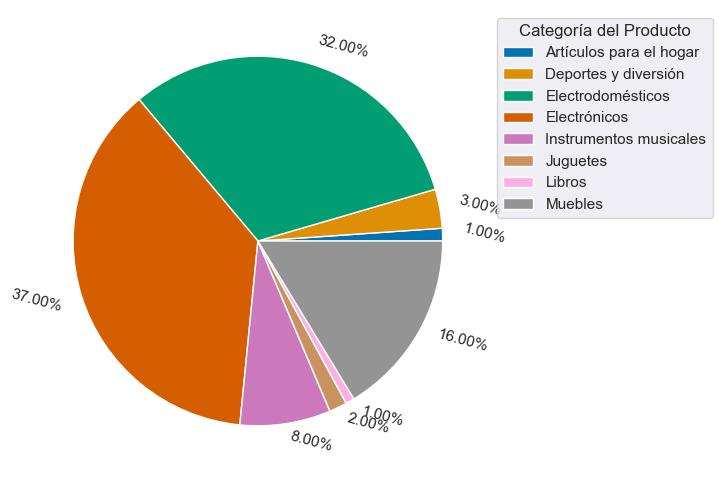

In [46]:
crear_piechart(df_categorias_tienda1,
               columna1='Categoría del Producto',
               columna2='Precio',
               plot_size=(8,6),
               xlabel_rotation=-15)

In [ ]:
def crear_piechart(df: pd.DataFrame,
                  columna1: str,
                  columna2: str,
                  plot_size: tuple=(8, 6),
                  ax=None,
                  titulo: str=None,
                  xlabel: str=None,
                  ylabel: str=None,
                  ylim: int=None,
                  xlabel_rotation: int=None,
                  mostrar_valores: bool=False):

### Clasificación Promedio de la tienda

In [ ]:
dfs = [df_tienda1, df_tienda2, df_tienda3, df_tienda4]
graficos_comparacion(df_list=dfs, 
                     grafico=crear_barplot, 
                     columna_1='Calificación',
                     super_title='Comparación de Calificaciones por Tienda',
                     ylim=1600,
                     mostrar_valores=True,
                     tipo= 'Frecuencias')

### Productos más y menos vendidos

### Costo de envío promedio por tienda